In [96]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [97]:
#import the requests library
import requests

In [98]:
#import the API key
from config import weather_api_key

In [99]:
# Starting URL for weahter Map API call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=52a29b1c49b86aa55d968385d4a2e37c


In [100]:
#Import the datetime module from the datetime library
from datetime import datetime

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [101]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [102]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [103]:
# Create a list for holding the cities
cities =[]
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

598

In [104]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [105]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                            "Lat": city_lat,
                            "Lng": city_lng,
                            "Max Temp": city_max_temp,
                            "Humidity": city_humidity,
                            "Cloudiness": city_clouds,
                            "Wind Speed": city_wind,
                            "Country": city_country,
                            "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

 arlit
Processing Record 44 of Set 3 | terre haute
Processing Record 45 of Set 3 | bethel
Processing Record 46 of Set 3 | pisco
Processing Record 47 of Set 3 | baruun-urt
Processing Record 48 of Set 3 | lac du bonnet
Processing Record 49 of Set 3 | lochem
Processing Record 50 of Set 3 | can tho
Processing Record 1 of Set 4 | kapaa
Processing Record 2 of Set 4 | geraldton
Processing Record 3 of Set 4 | rantepao
Processing Record 4 of Set 4 | namibe
Processing Record 5 of Set 4 | palabuhanratu
City not found. Skipping...
Processing Record 6 of Set 4 | kudahuvadhoo
Processing Record 7 of Set 4 | saint george
Processing Record 8 of Set 4 | grand centre
City not found. Skipping...
Processing Record 9 of Set 4 | deer lake
Processing Record 10 of Set 4 | amderma
City not found. Skipping...
Processing Record 11 of Set 4 | coquimbo
Processing Record 12 of Set 4 | beringovskiy
Processing Record 13 of Set 4 | tabuk
Processing Record 14 of Set 4 | mehamn
Processing Record 15 of Set 4 | albany
Proc

In [106]:
print(len(city_data))

547


In [107]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hobart,-42.88,147.33,60.80,67,40,14.99,AU,2020-04-02 19:10:43
1,Nome,64.50,-165.41,21.00,92,90,13.87,US,2020-04-02 19:07:46
2,Narsaq,60.92,-46.05,26.60,63,40,3.36,GL,2020-04-02 19:10:44
3,Xining,36.62,101.77,30.94,37,99,3.56,CN,2020-04-02 19:10:44
4,Mount Gambier,-37.83,140.77,57.20,87,40,9.17,AU,2020-04-02 19:08:54
5,Barrow,71.29,-156.79,6.80,84,1,12.75,US,2020-04-02 19:10:45
6,Ribeira Grande,38.52,-28.70,61.41,88,100,11.68,PT,2020-04-02 19:10:45
7,Jamestown,42.10,-79.24,51.80,48,40,14.99,US,2020-04-02 19:10:46
8,Dengzhou,37.81,120.75,44.29,80,0,13.22,CN,2020-04-02 19:10:46
9,Busselton,-33.65,115.33,55.00,50,64,11.81,AU,2020-04-02 19:10:46


In [108]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hobart,AU,2020-04-02 19:10:43,-42.88,147.33,60.80,67,40,14.99
1,Nome,US,2020-04-02 19:07:46,64.50,-165.41,21.00,92,90,13.87
2,Narsaq,GL,2020-04-02 19:10:44,60.92,-46.05,26.60,63,40,3.36
3,Xining,CN,2020-04-02 19:10:44,36.62,101.77,30.94,37,99,3.56
4,Mount Gambier,AU,2020-04-02 19:08:54,-37.83,140.77,57.20,87,40,9.17
5,Barrow,US,2020-04-02 19:10:45,71.29,-156.79,6.80,84,1,12.75
6,Ribeira Grande,PT,2020-04-02 19:10:45,38.52,-28.70,61.41,88,100,11.68
7,Jamestown,US,2020-04-02 19:10:46,42.10,-79.24,51.80,48,40,14.99
8,Dengzhou,CN,2020-04-02 19:10:46,37.81,120.75,44.29,80,0,13.22
9,Busselton,AU,2020-04-02 19:10:46,-33.65,115.33,55.00,50,64,11.81


In [109]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label='City_ID')

In [110]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [111]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'04/02/20'

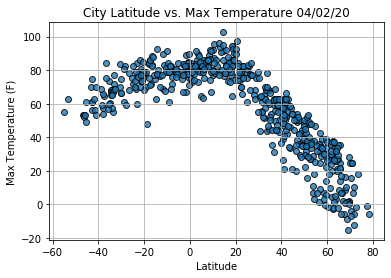

In [112]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

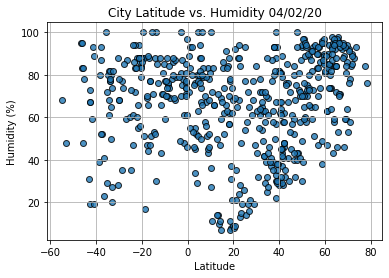

In [113]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

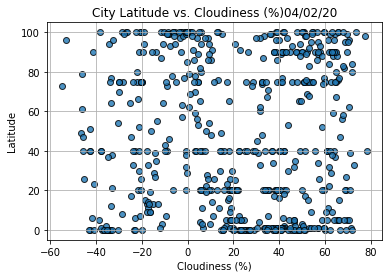

In [114]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats,cloudiness, edgecolors='black', linewidths= 1, marker='o',alpha=0.8,label='Cities')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (%)" + time.strftime('%x'))
plt.xlabel("Cloudiness (%)")
plt.ylabel('Latitude')
plt.grid (True)
#Save the figure
plt.savefig("weather_data/Fig3.png")
#Show plot
plt.show()

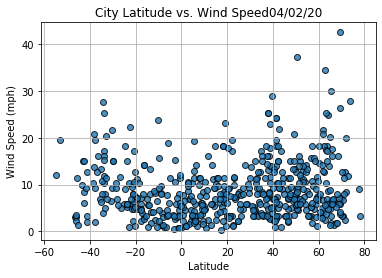

In [115]:
# Build the scatter plots for latitude vs. winde speed
plt.scatter(lats,wind_speed,edgecolors="black", linewidths=1, marker="o", alpha=0.8, label= "Cities")

#Incorporate the order graph properties
plt.title(f"City Latitude vs. Wind Speed" + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
# Save the figure. 
plt.savefig("weather_data/Fig5.png")
# Show plot
plt.show()

In [172]:
#Import linear regression from the Scipy stats module
from scipy.stats import linregress

In [173]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values,y_values,title, y_label, text_coordinates):
    # Perform linear regression
    (slope, intercept,r_value, p_value, std_err) = linregress(x_values,y_values)
    # Calculate the regression line"y value"from the slope
    regress_values = x_values* slope + intercept
    # Get the equation of the line
    line_eq ="y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.show()



In [174]:
# Create Northern and Southern Hemisphere DF 
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"]>= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] <0)]

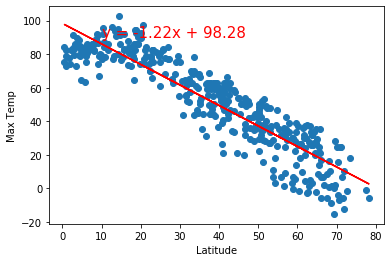

In [185]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemispheren \n for Maximum Temperature', 'Max Temp',(10,90))

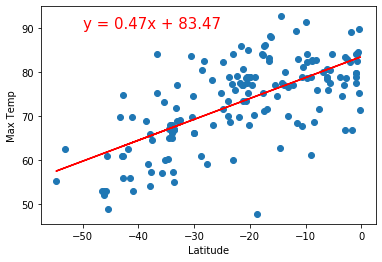

In [192]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Maxium Temperature','Max Temp', (-50,90))

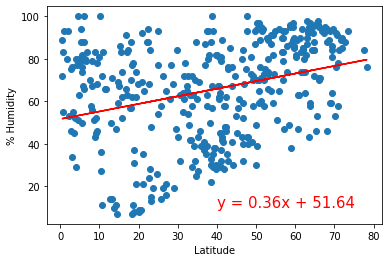

In [177]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

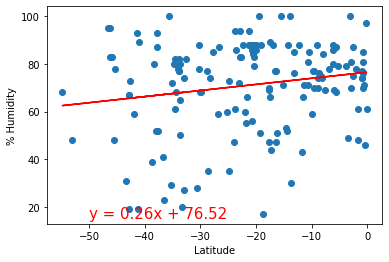

In [178]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

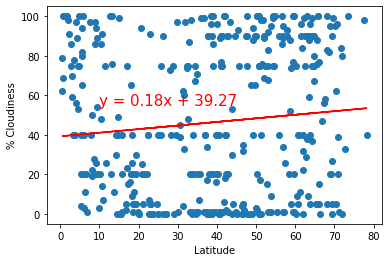

In [179]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(10,55))